In [1]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 388.9 kB/s eta 0:00:01
   -------------------- ------------------- 153.6/294.9 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
#pandas, seaborn, 그리고 matplotlib 라이브러리를 사용하여 CSV 파일 읽기
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv("C:/Users/user/Documents/GitHub/ml202401-midterm-sungmars/한국가스공사_총발전량 월별 기온효과_20210630.csv",encoding = 'cp949')
df.head()

,연,월,temp,YD
0,2007,1,0.11,200701
1,2007,2,0.08,200702
2,2007,3,0.06,200703
3,2007,4,0.03,200704
4,2007,5,0.01,200705


In [8]:
#LabelEncoder를 사용하여 데이터를 전처리하는 것입니다
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = df[['YD']]
y = df['temp']

X['YD'] = le.fit_transform(X['YD'])
y = le.fit_transform(y)



C:\Users\user\AppData\Local\Temp\ipykernel_25720\4292865926.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['YD'] = le.fit_transform(X['YD'])


In [15]:
#K-Means 클러스터링을 사용하여 데이터를 클러스터링
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
#K-Means 클러스터링의 성능을 측정하는 실루엣 점수를 계산
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.6223698469556863

In [17]:
#K-Means 클러스터링을 위한 최적의 클러스터 개수를 찾기 위해 엘보우
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

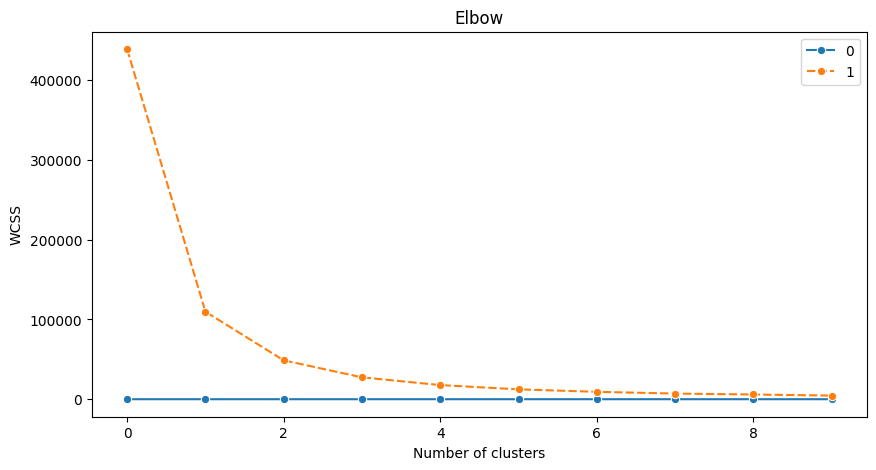

In [18]:
#엘보우 방법을 사용하여 최적의 클러스터 개수를 찾기 위해 클러스터 개수에 따른 클러스터 내 제곱합(WCSS)을 시각화
plt.figure(figsize=(10,5))
sns.lineplot(data=(range(1, 11), wcss), marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

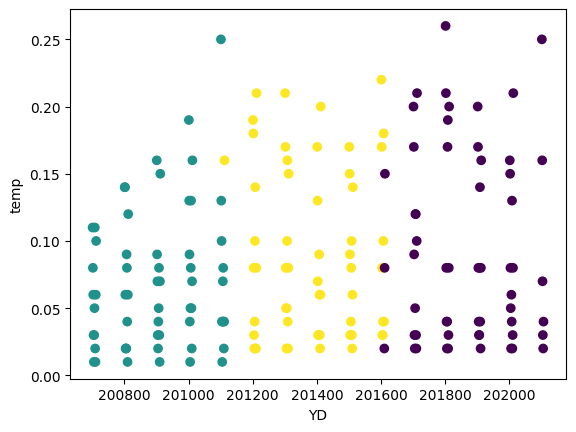

In [19]:
#데이터를 클러스터링, 시각화
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['YD'],df['temp'],c = labels)
plt.xlabel('YD')
plt.ylabel('temp')
plt.show()

In [14]:
#K-Means 클러스터링 Accuracy score 평가
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 13 out of 174 samples were correctly labeled.
Accuracy score: 0.07
